In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ss
import scipy.stats as stats

In [29]:
# create coherence for 10 averages
N = 100
data1 = np.random.randn(16384 * N)
data2 = np.random.randn(16384 * N)
ts = 1./16384 * np.arange(0,N*16384)
combfreqs = np.arange(128,8192+128,128)
for combfreq in combfreqs:
    data1 += 0.005 * np.sin(2 * np.pi * combfreq * ts)
    data2 += 0.005 * np.sin(2 * np.pi * combfreq * ts)
srate = 16384
First=1
for ii in range(N):
    data1fft = np.fft.rfft(data1[srate*ii:srate*(ii+1)])
    data2fft = np.fft.rfft(data2[srate*ii:srate*(ii+1)])
    if First:
        csd = np.conj(data1fft) * data2fft
        psd1 = np.conj(data1fft) * data1fft
        psd2 = np.conj(data2fft) * data2fft
        First = 0
    else:
        csd = (csd * ii + np.conj(data1fft) * data2fft) / (ii + 1)
        psd1 = (psd1 * ii + np.conj(data1fft) * data1fft) / (ii + 1)
        psd2 = (psd2 * ii + np.conj(data2fft) * data2fft) / (ii + 1)

freqs = np.fft.rfftfreq(16384, d=1./16384)
coh = np.abs(csd)**2 / (psd1 * psd2)

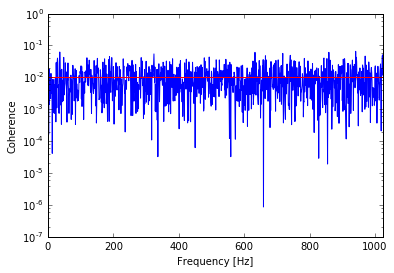

In [35]:
# plot coherence ones just to check it has expected behavior
plot = plt.figure()
plt.plot(freqs, np.abs(coh))
plt.plot([freqs[0], freqs[-1]], [1./N, 1./N],'r')
ax = plt.gca()
ax.set_ylabel('Coherence')
ax.set_xlabel('Frequency [Hz]')
ax.set_yscale('log')
ax.set_xlim(0,1024)
plt.show()

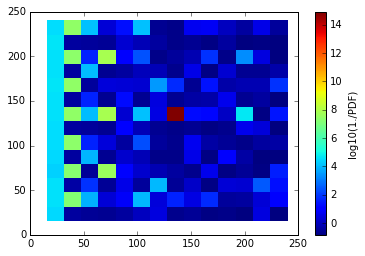

In [36]:
coh = np.abs(coh)
starts = np.arange(16,256, 16)
spacings = np.arange(16, 256, 16)
sums = []
ns = []
for start in starts:
    for spacing in spacings:
        idxs = np.arange(start, 8192, spacing)
        ns.append(len(idxs))
        sums.append(np.sum(coh[idxs]))
ls = []
for n,s in zip(ns, sums):
    ls.append(stats.gamma.pdf(N*s, n) * N)
ls = np.asarray(ls)
ls = ls.reshape((len(starts), len(spacings)))
plot2 = plt.figure()
# we actually want it to be unlikely based on our distribution...right?
# nailed it. you can't even see it in the coherence plot above!!
plt.pcolormesh(starts, spacings, np.log10(1./ls))
plt.colorbar(label="log10(1./PDF)")
plt.show()